In [1]:
#import custom classes from decision tree
from decisiontree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from model_selection import train_test_split
from metrics import accuracy
from metrics import mse
from sklearn.datasets import load_diabetes

# Classification Tree from Scratch

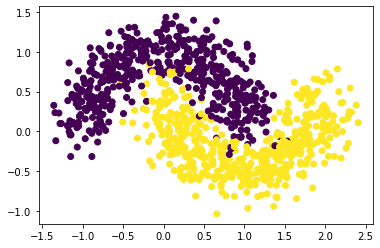

In [2]:
N= 1000
X,Y = make_moons(N, noise=0.2)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [3]:
Y = Y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, val = 0.2)

classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_1 <= threshold: 0.2406 , info_gain: 0.2178
 left:X_0 <= threshold: -0.6785 , info_gain: 0.1274
  left:0
  right:X_1 <= threshold: -0.0868 , info_gain: 0.0232
    left:X_1 <= threshold: -0.2216 , info_gain: 0.0038
        left:1
        right:X_1 <= threshold: -0.2193 , info_gain: 0.0275
                left:0
                right:X_0 <= threshold: 1.526 , info_gain: 0.0092
                                left:1
                                right:1
    right:X_0 <= threshold: 1.4319 , info_gain: 0.0839
        left:X_0 <= threshold: 0.5848 , info_gain: 0.3688
                left:X_0 <= threshold: -0.4964 , info_gain: 0.0193
                                left:1
                                right:1
                right:X_0 <= threshold: 1.2746 , info_gain: 0.0648
                                left:0
                                right:1
        right:1
 right:X_0 <= threshold: 1.3581 , info_gain: 0.1075
  left:X_1 <= threshold: 0.6088 , info_gain: 0.0119
    left:X_0 <= t

In [4]:
#test
Y_pred = classifier.predict(X_test) 

print(f"Our implementation of tree from scratch reaches an accuracy of {accuracy(Y_test, Y_pred)*100}%")

Our implementation of tree from scratch reaches an accuracy of 96.5%


### Comparison with sklearn

In [5]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeClassifier as dtc

In [6]:
tree_sklearn = dtc(min_samples_split=3, max_depth=5)
tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has an accuracy of {accuracy(Y_test, y_hat)*100}%")

With the same parameters, sklearn implementation has an accuracy of 97.0%


# Regression Tree from Scratch

In [7]:
data = load_diabetes()
x = data.data
y = data.target
y = y.reshape(-1,1)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, val= 0.2)

In [9]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=5)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_8 <= threshold: 0.0213 , info_gain: 1630.3399
 left:X_2 <= threshold: 0.0046 , info_gain: 772.7228
  left:X_8 <= threshold: -0.0332 , info_gain: 315.6592
    left:X_3 <= threshold: 0.0701 , info_gain: 218.4001
        left:X_2 <= threshold: 0.0013 , info_gain: 175.3331
                left:72
                right:200
        right:216
    right:X_7 <= threshold: 0.0284 , info_gain: 333.361
        left:X_4 <= threshold: -0.0539 , info_gain: 349.7974
                left:129
                right:97
        right:X_4 <= threshold: 0.0548 , info_gain: 784.1404
                left:100
                right:253
  right:X_8 <= threshold: -0.0308 , info_gain: 792.4971
    left:X_2 <= threshold: 0.0175 , info_gain: 833.1429
        left:X_0 <= threshold: -0.06 , info_gain: 176.3333
                left:96
                right:69
        right:X_8 <= threshold: -0.0484 , info_gain: 619.4086
                left:145
                right:141
    right:X_3 <= threshold: -0.0401 , info_gain:

In [10]:
y_hat = regressor.predict(X_test)
print(f"Our implementation of tree from scratch reaches a MSE of {mse(Y_test, y_hat)}")


Our implementation of tree from scratch reaches a MSE of 5206.303370786517


### Comparison with sklearn

In [11]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeRegressor as dtr

In [12]:
tree_sklearn = dtr(min_samples_split=3, max_depth=5)
tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has a MSE of {mse(Y_test, y_hat)}")

With the same parameters, sklearn implementation has a MSE of 3598.5654456470747
